In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('recuitment.csv')
df.head()

,Respondent ID,Start Date,End Date,Email Address,First Name,Last Name,Custom Data 1,Identify which division you work in.,Unnamed: 8,Which of the following best describes your position level?,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Question 30,Unnamed: 98,Unnamed: 99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,Other (please specify),Response,...,Response 8,Response 9,Response 10,Response 11,Response 12,Response 13,Response 14,Response 1,Response 2,Response 3
1,5.379192e+09,2021-01-22 12:01:17,2021-01-22 12:40:34,NaN,NaN,NaN,NaN,Infrastructure,NaN,Staff,...,NaN,Answer 8,Answer 8,Answer 4,NaN,NaN,Answer 5,NaN,NaN,NaN
2,2.658723e+09,2021-01-22 06:56:37,2021-01-22 07:34:10,NaN,NaN,NaN,NaN,Finance,NaN,Staff,...,NaN,Answer 5,NaN,NaN,Answer 2,NaN,Answer 5,NaN,NaN,Answer 1
3,4.044163e+09,2021-01-22 06:35:18,2021-01-22 06:47:32,NaN,NaN,NaN,NaN,Infrastructure,NaN,Department Lead,...,NaN,NaN,Answer 4,Answer 4,Answer 6,NaN,Answer 6,NaN,Answer 1,NaN
4,5.535866e+09,2021-01-21 21:29:32,2021-01-21 21:40:24,NaN,NaN,NaN,NaN,Infrastructure,NaN,Manager,...,Answer 2,Answer 5,Answer 7,NaN,Answer 6,NaN,Answer 7,Answer 7,Answer 1,Answer 6


In [2]:
# Display all columns to get a full view
print(df.columns)

Index(['Respondent ID', 'Start Date', 'End Date', 'Email Address',
       'First Name', 'Last Name', 'Custom Data 1',
       'Identify which division you work in.', 'Unnamed: 8',
       'Which of the following best describes your position level?',
       'Which generation are you apart of?',
       'Please select the gender in which you identify.',
       'Which duration range best aligns with your tenure at your company?',
       'Which of the following best describes your employment type?',
       'Question 1', 'Question 2', 'Question 3', 'Question 4', 'Unnamed: 18',
       'Question 5', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Question 6', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Question 7', 'Unnamed: 32', 'Question 8', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Question 9', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Question 10', 'Unnamed: 42', 'Unnamed: 43',
       'Unna

In [3]:
df.drop(columns=['Respondent ID', 'Email Address', 'First Name', 'Last Name', 'Custom Data 1'], inplace=True)
print(df.columns)
print(df.head())

Index(['Start Date', 'End Date', 'Identify which division you work in.',
       'Unnamed: 8',
       'Which of the following best describes your position level?',
       'Which generation are you apart of?',
       'Please select the gender in which you identify.',
       'Which duration range best aligns with your tenure at your company?',
       'Which of the following best describes your employment type?',
       'Question 1', 'Question 2', 'Question 3', 'Question 4', 'Unnamed: 18',
       'Question 5', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Question 6', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Question 7', 'Unnamed: 32', 'Question 8', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Question 9', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Question 10', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Question 11', 'Unnamed: 47',
       'Question 12', 'Questio

In [4]:
# The first row contains descriptive labels and is not a data entry, let's remove it.
df = df.iloc[1:].copy()

# Print the columns and the first 5 rows to see the changes.
print(df.columns)
print(df.head())

Index(['Start Date', 'End Date', 'Identify which division you work in.',
       'Unnamed: 8',
       'Which of the following best describes your position level?',
       'Which generation are you apart of?',
       'Please select the gender in which you identify.',
       'Which duration range best aligns with your tenure at your company?',
       'Which of the following best describes your employment type?',
       'Question 1', 'Question 2', 'Question 3', 'Question 4', 'Unnamed: 18',
       'Question 5', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Question 6', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Question 7', 'Unnamed: 32', 'Question 8', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Question 9', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Question 10', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Question 11', 'Unnamed: 47',
       'Question 12', 'Questio

In [5]:
# Rename the key demographic columns to make them more descriptive
df.rename(columns={
    'Identify which division you work in.': 'Division',
    'Which of the following best describes your position level?': 'Position',
    'Which generation are you apart of?': 'Generation',
    'Please select the gender in which you identify.': 'Gender',
    'Which duration range best aligns with your tenure at your company?': 'Tenure',
    'Which of the following best describes your employment type?': 'Employment_Type'
}, inplace=True)

# Print the columns to confirm the changes
print(df.columns)

# Print the first 5 rows to see the result
print(df.head())

Index(['Start Date', 'End Date', 'Division', 'Unnamed: 8', 'Position',
       'Generation', 'Gender', 'Tenure', 'Employment_Type', 'Question 1',
       'Question 2', 'Question 3', 'Question 4', 'Unnamed: 18', 'Question 5',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Question 6', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Question 7',
       'Unnamed: 32', 'Question 8', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Question 9', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Question 10', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Question 11', 'Unnamed: 47',
       'Question 12', 'Question 13', 'Question 14', 'Question 15',
       'Question 16', 'Question 17', 'Question 18', 'Question 19',
       'Unnamed: 56', 'Question 20', 'Question 21', 'Question 22',
       'Unnamed: 60', 'Question 23', 'Question 24', 'Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unname

In [6]:
# Drop the Start Date, End Date, and the 'Unnamed: 8' column
df.drop(columns=['Start Date', 'End Date', 'Unnamed: 8'], inplace=True)

# Display the value counts for the key demographic columns
demographic_columns = ['Division', 'Position', 'Generation', 'Gender', 'Tenure', 'Employment_Type']
for column in demographic_columns:
    print(f"Value counts for '{column}':\n{df[column].value_counts()}\n")

# Display the first 5 rows to see the changes
print(df.head())

Value counts for 'Division':
Division
Infrastructure                          48
Finance                                 44
Information Technology                  26
People                                  23
Executive                               14
Commercial                              14
Legal                                    9
Port Security & Emergency Operations     8
Port Operations                          7
Other (please specify)                   2
Government & Public Relations            1
Internal Audit                           1
Name: count, dtype: int64

Value counts for 'Position':
Position
Staff                116
Manager               46
Department Lead       28
Chief / Executive      6
Name: count, dtype: int64

Value counts for 'Generation':
Generation
Generation X (born between 1965-1980)    75
Millennial (born between 1981-2000)      66
Baby Boomer (born between 1946-1964)     39
Prefer not to answer                     15
Generation Z (born 2001 or later)   

Division percentages:
 Division
Infrastructure                          24.365482
Finance                                 22.335025
Information Technology                  13.197970
People                                  11.675127
Executive                                7.106599
Commercial                               7.106599
Legal                                    4.568528
Port Security & Emergency Operations     4.060914
Port Operations                          3.553299
Other (please specify)                   1.015228
Government & Public Relations            0.507614
Internal Audit                           0.507614
Name: proportion, dtype: float64


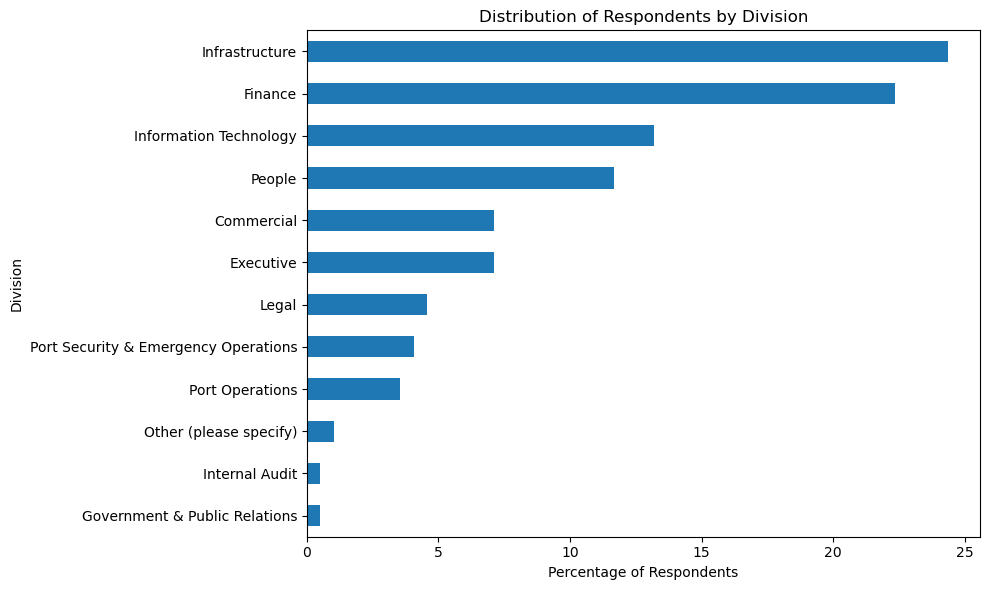

In [7]:
import matplotlib.pyplot as plt

# Calculate the percentage of respondents in each division
division_percentages = df['Division'].value_counts(normalize=True) * 100

# Print the percentages
print("Division percentages:\n", division_percentages)

# Create a bar chart for the division distribution
division_percentages.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Respondents by Division')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Division')
plt.tight_layout()
plt.show()

Position percentages:
 Position
Staff                59.183673
Manager              23.469388
Department Lead      14.285714
Chief / Executive     3.061224
Name: proportion, dtype: float64


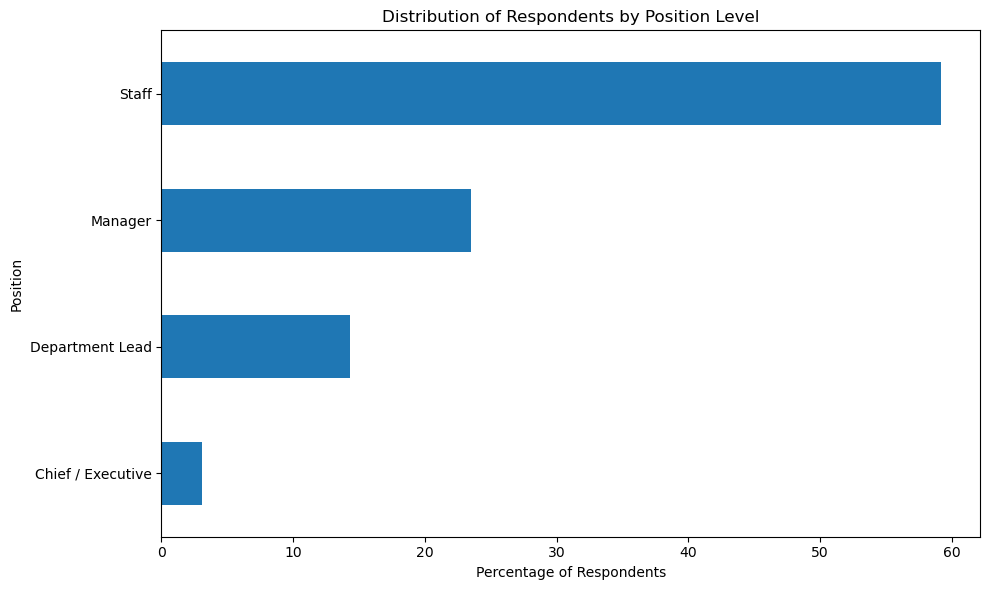

In [8]:
# Calculate the percentage of respondents in each position level
position_percentages = df['Position'].value_counts(normalize=True) * 100

# Print the percentages
print("Position percentages:\n", position_percentages)

# Create a bar chart for the position distribution
position_percentages.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Respondents by Position Level')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

Generation percentages:
 Generation
Generation X (born between 1965-1980)    38.265306
Millennial (born between 1981-2000)      33.673469
Baby Boomer (born between 1946-1964)     19.897959
Prefer not to answer                      7.653061
Generation Z (born 2001 or later)         0.510204
Name: proportion, dtype: float64


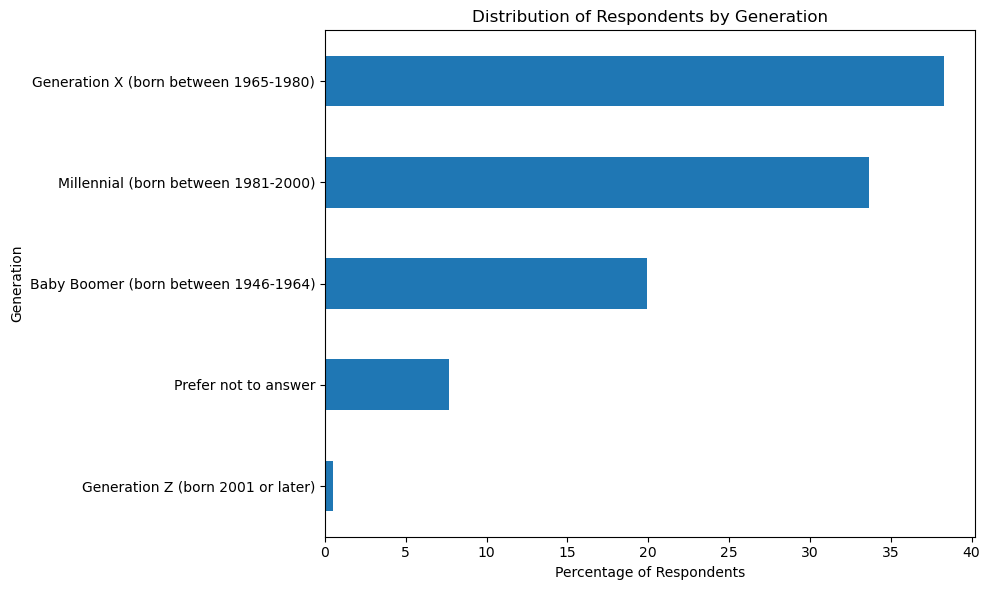

In [9]:
# Calculate the percentage of respondents in each generation
generation_percentages = df['Generation'].value_counts(normalize=True) * 100

# Print the percentages
print("Generation percentages:\n", generation_percentages)

# Create a bar chart for the generation distribution
generation_percentages.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Respondents by Generation')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Generation')
plt.tight_layout()
plt.show()

Gender percentages:
 Gender
Female                  48.979592
Male                    43.877551
Prefer not to answer     6.632653
Non-Binary               0.510204
Name: proportion, dtype: float64


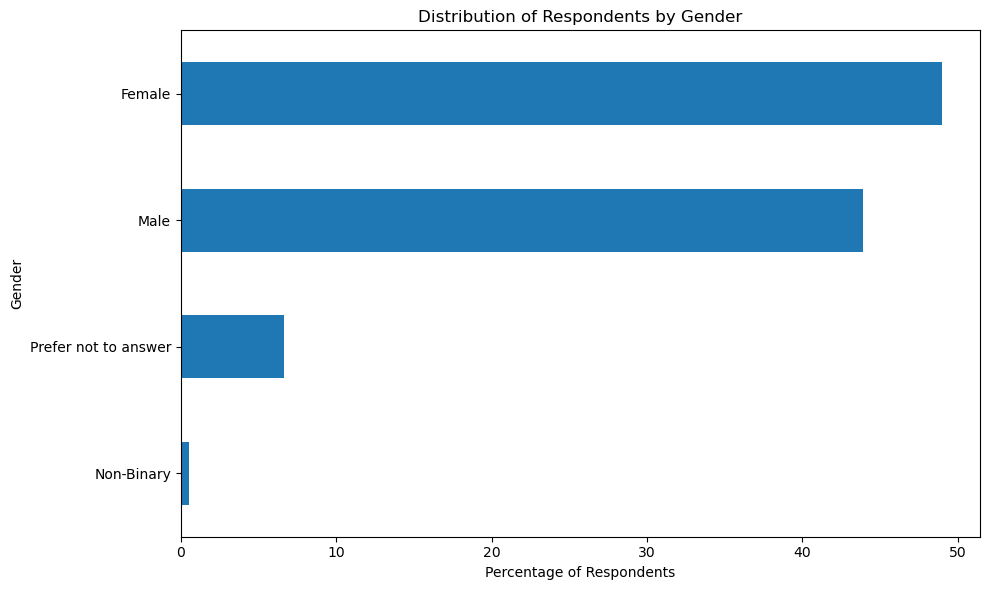

In [10]:
# Calculate the percentage of respondents in each gender category
gender_percentages = df['Gender'].value_counts(normalize=True) * 100

# Print the percentages
print("Gender percentages:\n", gender_percentages)

# Create a bar chart for the gender distribution
gender_percentages.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Respondents by Gender')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

Tenure percentages:
 Tenure
10+ years     32.828283
5-10 years    28.787879
0-2 years     21.717172
3-5 years     16.666667
Name: proportion, dtype: float64

Employment Type percentages:
 Employment_Type
Full time Employee    100.0
Name: proportion, dtype: float64


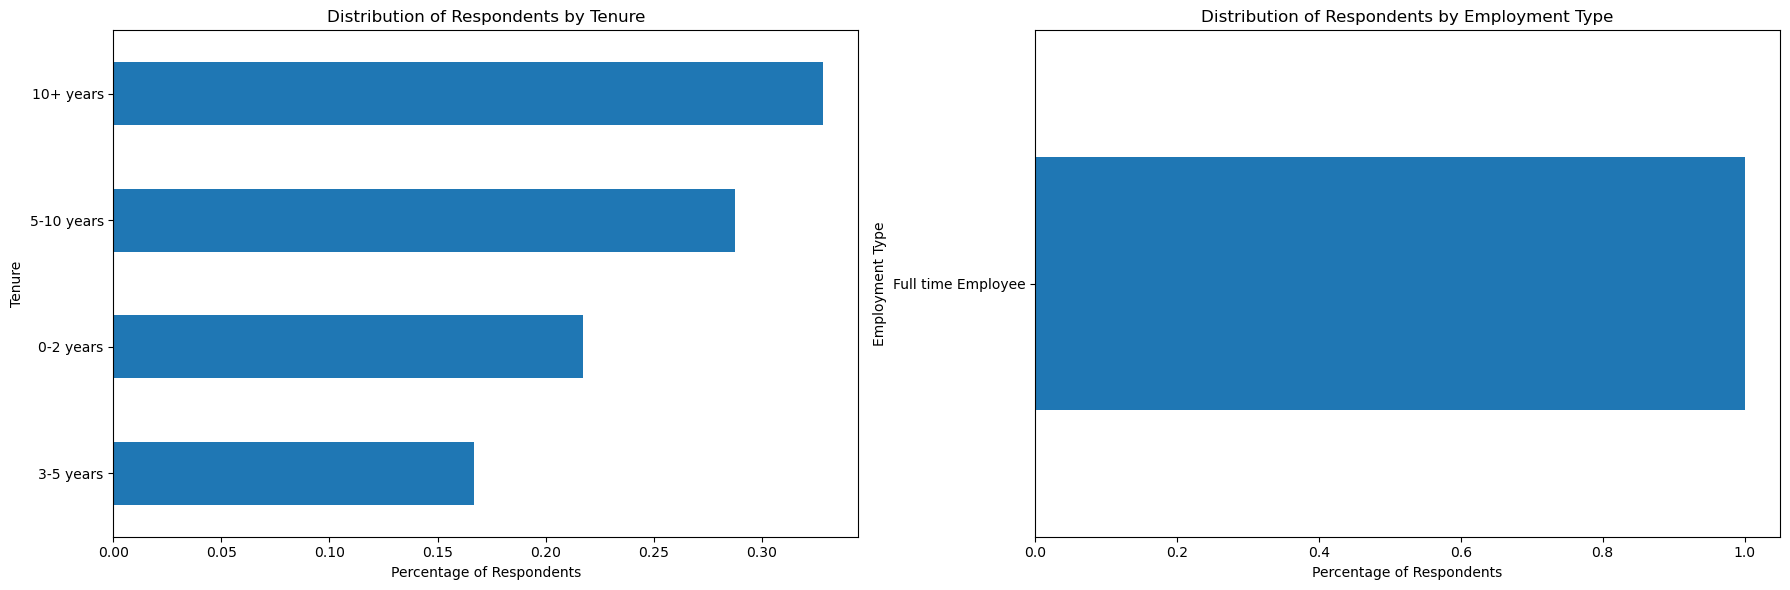

In [11]:
# Calculate and display value counts for Tenure and Employment_Type
print("Tenure percentages:\n", df['Tenure'].value_counts(normalize=True) * 100)
print("\nEmployment Type percentages:\n", df['Employment_Type'].value_counts(normalize=True) * 100)

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart for Tenure
df['Tenure'].value_counts(normalize=True).sort_values(ascending=True).plot(kind='barh', ax=axes[0])
axes[0].set_title('Distribution of Respondents by Tenure')
axes[0].set_xlabel('Percentage of Respondents')
axes[0].set_ylabel('Tenure')

# Plot the bar chart for Employment_Type
df['Employment_Type'].value_counts(normalize=True).sort_values(ascending=True).plot(kind='barh', ax=axes[1])
axes[1].set_title('Distribution of Respondents by Employment Type')
axes[1].set_xlabel('Percentage of Respondents')
axes[1].set_ylabel('Employment Type')

plt.tight_layout()
plt.show()

Responses for Question 1:
 Answer 6    83
Answer 2    82
Answer 1    73
Answer 3    71
Answer 8    69
Answer 7    66
Answer 5    66
Answer 4    64
Name: count, dtype: int64


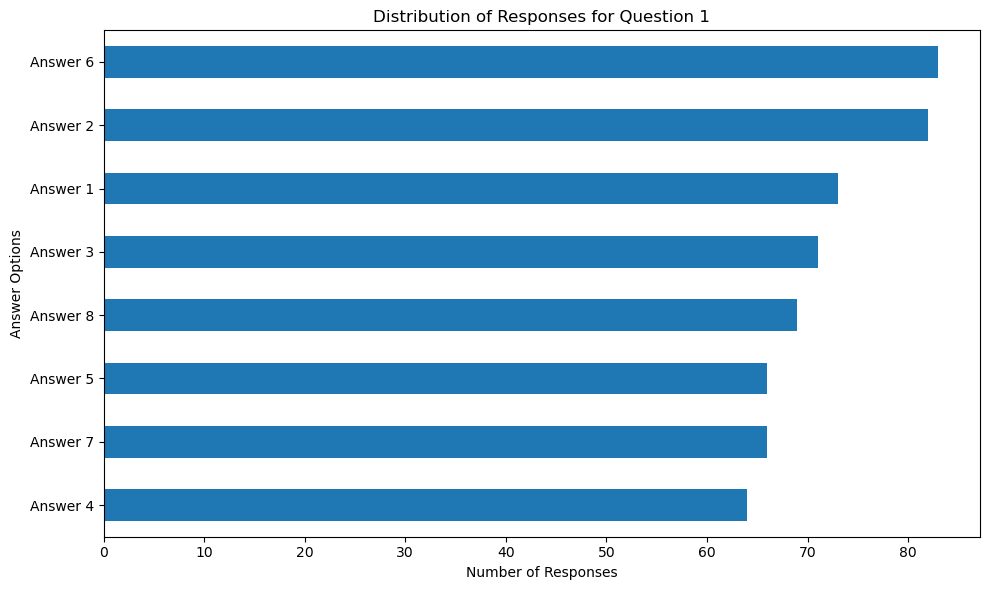

In [12]:
import matplotlib.pyplot as plt

# Identify the columns related to Question 1.
# Based on the structure, it appears these columns contain different answer options for a single question.
q1_columns = ['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Unnamed: 18']

# Combine the responses from all the related columns into a single series
q1_responses = df[q1_columns].stack().reset_index(drop=True)

# Calculate the frequency of each response
q1_counts = q1_responses.value_counts()

# Print the value counts
print("Responses for Question 1:\n", q1_counts)

# Create a bar chart for the responses
q1_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Responses for Question 1')
plt.xlabel('Number of Responses')
plt.ylabel('Answer Options')
plt.tight_layout()
plt.show()

Responses for Question 5:
 Answer 7    98
Answer 5    94
Answer 4    88
Answer 1    82
Answer 6    82
Answer 8    80
Answer 3    79
Answer 2    73
Name: count, dtype: int64


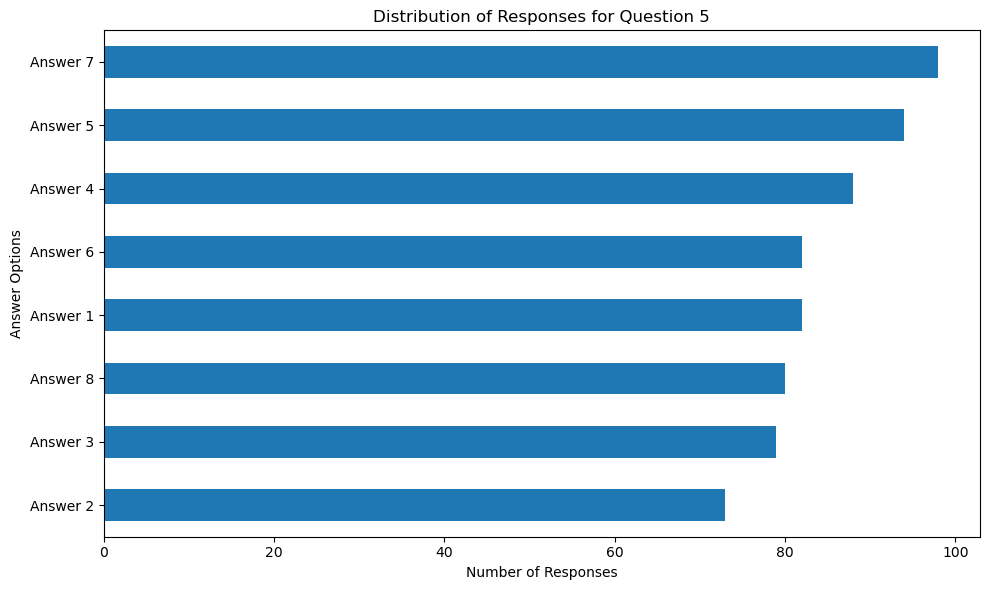

In [13]:
# Identify the columns related to Question 5
q5_columns = ['Question 5', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24']

# Combine the responses from all the related columns into a single series
q5_responses = df[q5_columns].stack().reset_index(drop=True)

# Calculate the frequency of each response
q5_counts = q5_responses.value_counts()

# Print the value counts
print("Responses for Question 5:\n", q5_counts)

# Create a bar chart for the responses
q5_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Responses for Question 5')
plt.xlabel('Number of Responses')
plt.ylabel('Answer Options')
plt.tight_layout()
plt.show()

Responses for Question 6:
 Answer 2    97
Answer 5    91
Answer 4    84
Answer 7    83
Answer 6    80
Answer 3    78
Answer 8    77
Answer 1    74
Name: count, dtype: int64


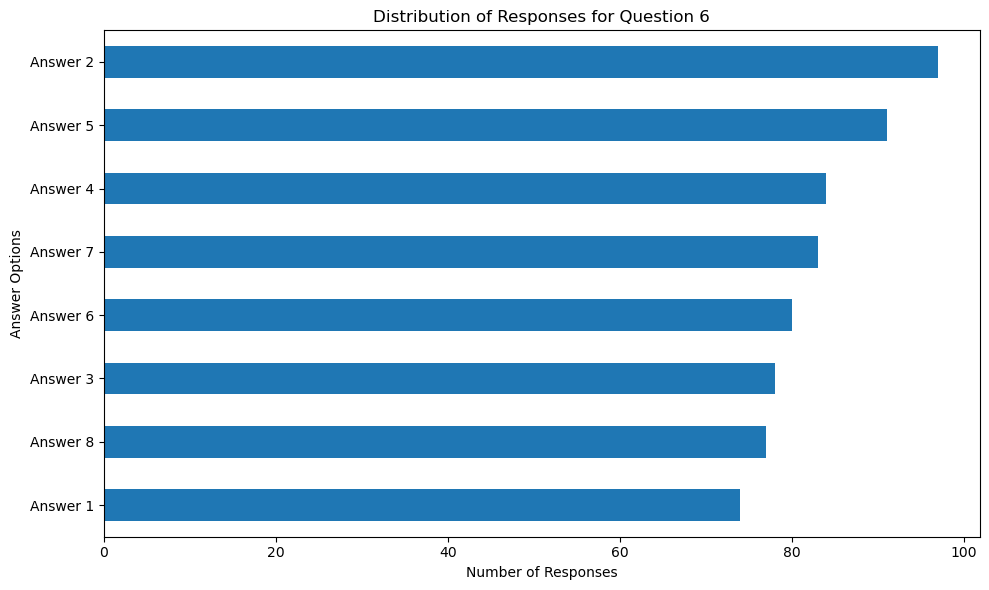

In [14]:
# Identify the columns related to Question 6
q6_columns = ['Question 6', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']

# Combine the responses from all the related columns into a single series
q6_responses = df[q6_columns].stack().reset_index(drop=True)

# Calculate the frequency of each response
q6_counts = q6_responses.value_counts()

# Print the value counts
print("Responses for Question 6:\n", q6_counts)

# Create a bar chart for the responses
q6_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Responses for Question 6')
plt.xlabel('Number of Responses')
plt.ylabel('Answer Options')
plt.tight_layout()
plt.show()

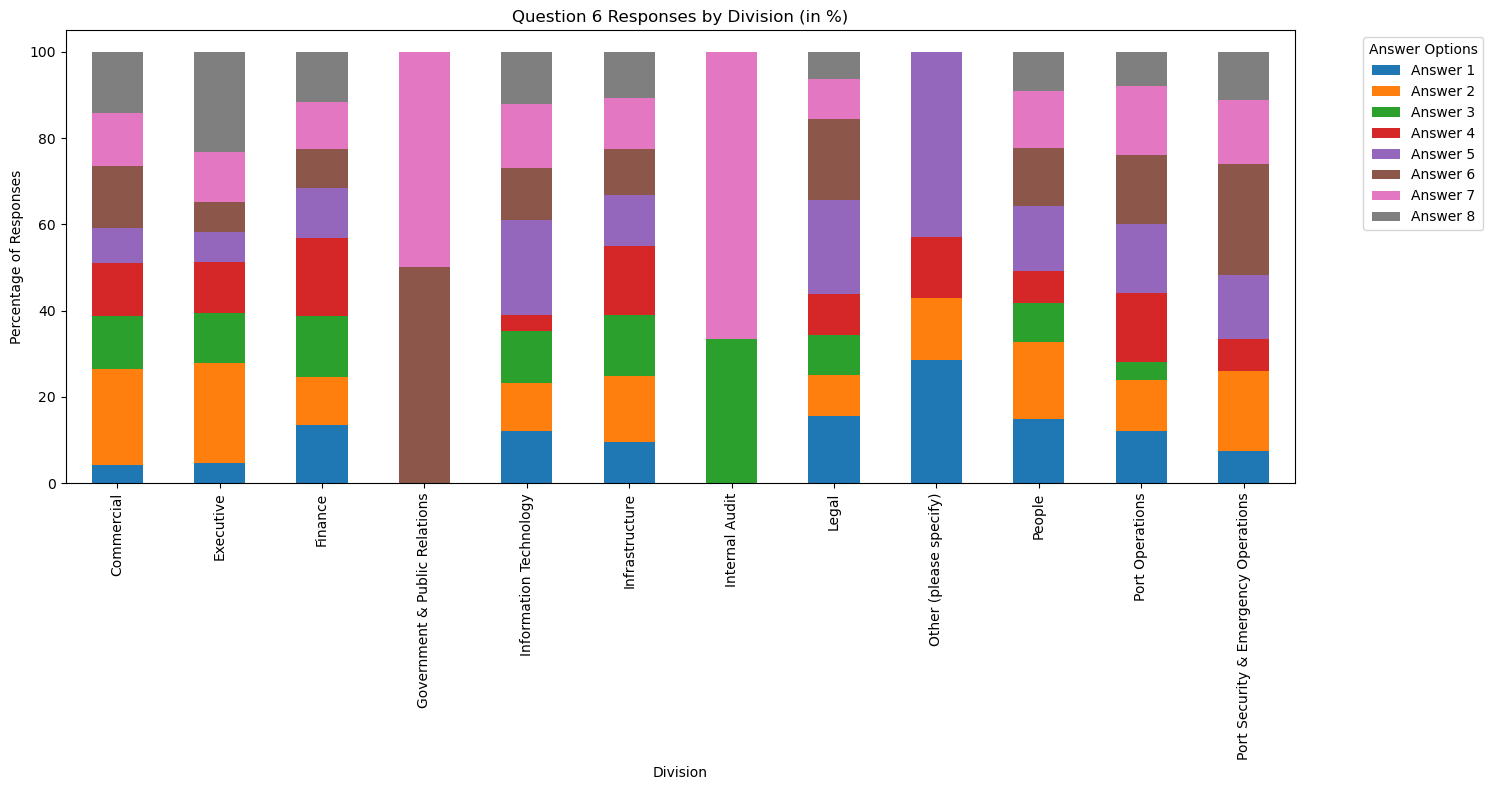

In [15]:
# Identify the columns for Question 6 and combine them
q6_columns = ['Question 6', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']
q6_responses_series = df[q6_columns].stack().reset_index(level=1, drop=True)

# Create a new DataFrame for analysis with the Division and combined Q6 responses
df_q6 = pd.DataFrame({
    'Division': df.loc[q6_responses_series.index, 'Division'],
    'Q6_Response': q6_responses_series.values
})

# Create a cross-tabulation table
cross_tab = pd.crosstab(df_q6['Division'], df_q6['Q6_Response'])

# Normalize the cross-tabulation table to show percentages within each division
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
cross_tab_norm.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Question 6 Responses by Division (in %)')
plt.xlabel('Division')
plt.ylabel('Percentage of Responses')
plt.legend(title='Answer Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

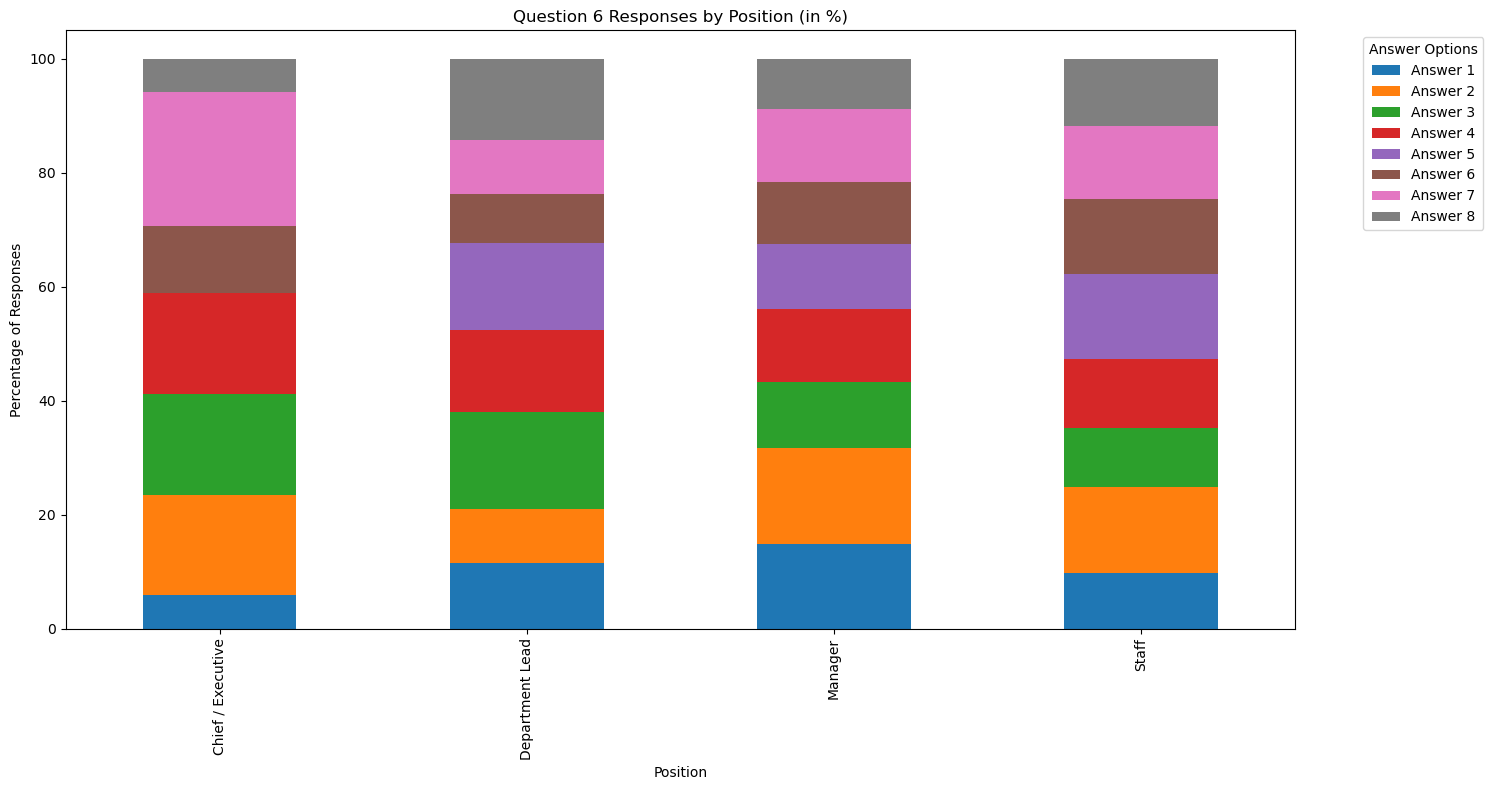

In [16]:
# Identify the columns for Question 6 and combine them
q6_columns = ['Question 6', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']
q6_responses_series = df[q6_columns].stack().reset_index(level=1, drop=True)

# Create a new DataFrame for analysis with the Position and combined Q6 responses
df_q6_position = pd.DataFrame({
    'Position': df.loc[q6_responses_series.index, 'Position'],
    'Q6_Response': q6_responses_series.values
})

# Create a cross-tabulation table
cross_tab_position = pd.crosstab(df_q6_position['Position'], df_q6_position['Q6_Response'])

# Normalize the cross-tabulation table to show percentages within each position
cross_tab_norm_position = cross_tab_position.div(cross_tab_position.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
cross_tab_norm_position.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Question 6 Responses by Position (in %)')
plt.xlabel('Position')
plt.ylabel('Percentage of Responses')
plt.legend(title='Answer Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

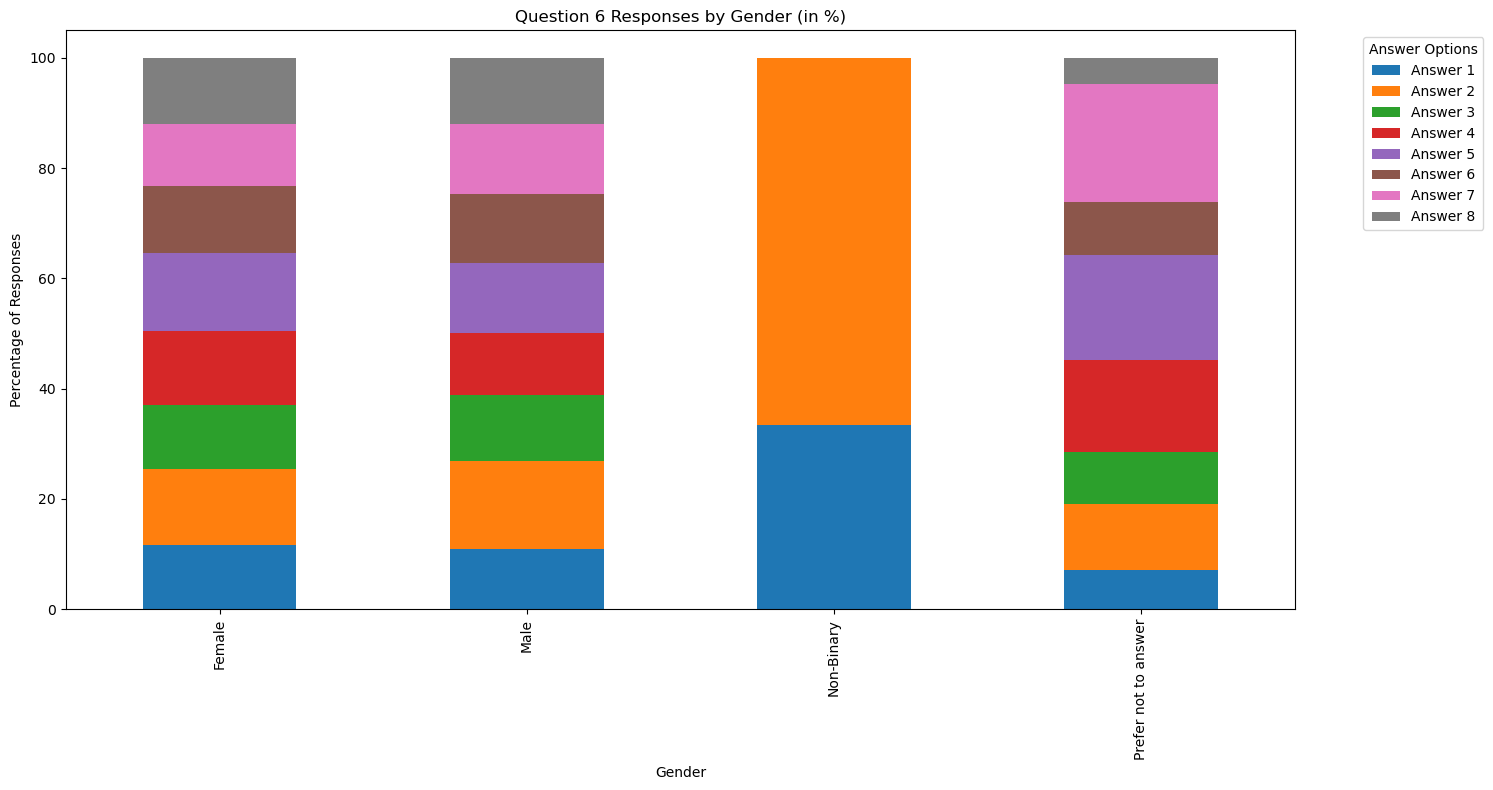

In [17]:
# Identify the columns for Question 6 and combine them
q6_columns = ['Question 6', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']
q6_responses_series = df[q6_columns].stack().reset_index(level=1, drop=True)

# Create a new DataFrame for analysis with the Gender and combined Q6 responses
df_q6_gender = pd.DataFrame({
    'Gender': df.loc[q6_responses_series.index, 'Gender'],
    'Q6_Response': q6_responses_series.values
})

# Create a cross-tabulation table
cross_tab_gender = pd.crosstab(df_q6_gender['Gender'], df_q6_gender['Q6_Response'])

# Normalize the cross-tabulation table to show percentages within each gender
cross_tab_norm_gender = cross_tab_gender.div(cross_tab_gender.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
cross_tab_norm_gender.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Question 6 Responses by Gender (in %)')
plt.xlabel('Gender')
plt.ylabel('Percentage of Responses')
plt.legend(title='Answer Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Responses for Question 7:
 Answer 4    33
Answer 1    32
Answer 6    32
Answer 7    31
Answer 3    30
Answer 5    29
Answer 8    25
Answer 2    25
Name: count, dtype: int64


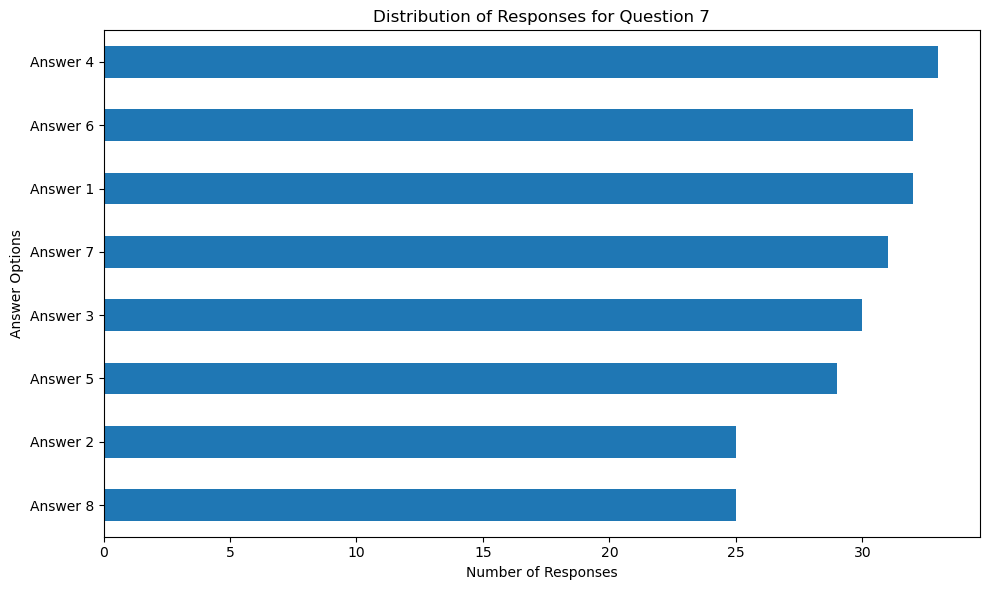

In [18]:
# Identify the columns for Question 7 and combine them
q7_columns = ['Question 7', 'Unnamed: 32']
q7_responses_series = df[q7_columns].stack().reset_index(drop=True)

# Calculate the frequency of each response
q7_counts = q7_responses_series.value_counts()

# Print the value counts
print("Responses for Question 7:\n", q7_counts)

# Create a bar chart for the responses
q7_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Responses for Question 7')
plt.xlabel('Number of Responses')
plt.ylabel('Answer Options')
plt.tight_layout()
plt.show()

Responses for Question 8:
 Answer 8    72
Answer 3    68
Answer 5    61
Answer 7    59
Answer 1    56
Answer 4    54
Answer 2    40
Answer 6    36
Name: count, dtype: int64


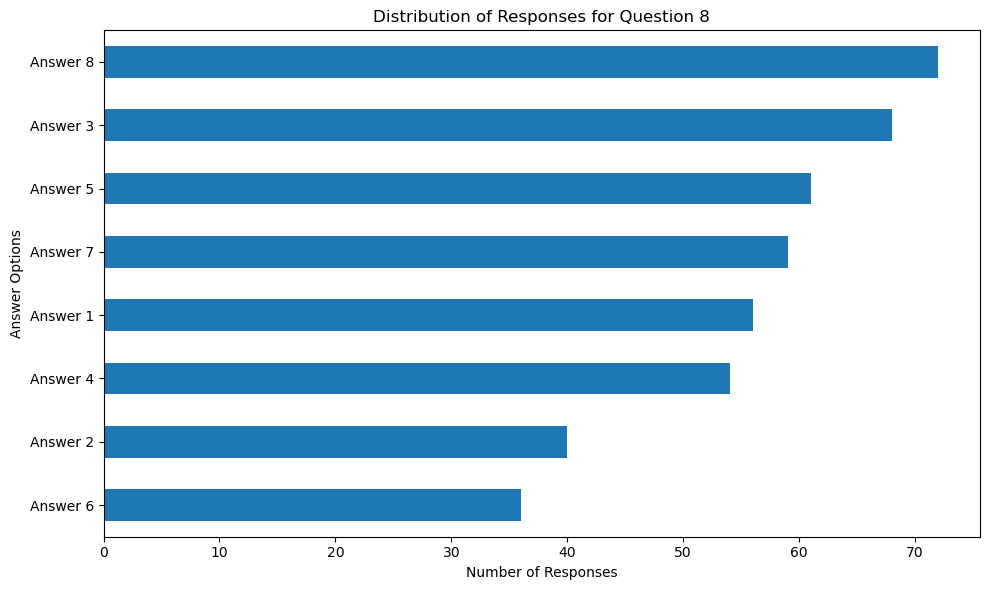

In [19]:
# Identify the columns for Question 8 and combine them
q8_columns = ['Question 8', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36']

# Combine the responses from all the related columns into a single series
q8_responses = df[q8_columns].stack().reset_index(drop=True)

# Calculate the frequency of each response
q8_counts = q8_responses.value_counts()

# Print the value counts
print("Responses for Question 8:\n", q8_counts)

# Create a bar chart for the responses
q8_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Responses for Question 8')
plt.xlabel('Number of Responses')
plt.ylabel('Answer Options')
plt.tight_layout()
plt.show()